In [1]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

## pretty up plots
plt.rc('font', family='Arial')
import seaborn as sns

In [2]:
def frequency_spectrum(x, sf):
    """
    derive frequency spectrum of a signal from time domain
    :param x: signal in time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    
    x = x- np.average(x) # zero-centering
    
    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr) # two sides frequency range
    
    frqarr = frqarr[range(n // 2)] # one side frequency range
    
    x = fft(x) / n # fft computing and normalization
    x = x[range(n // 2)]
    
    return frqarr, abs(x)


In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

23656320


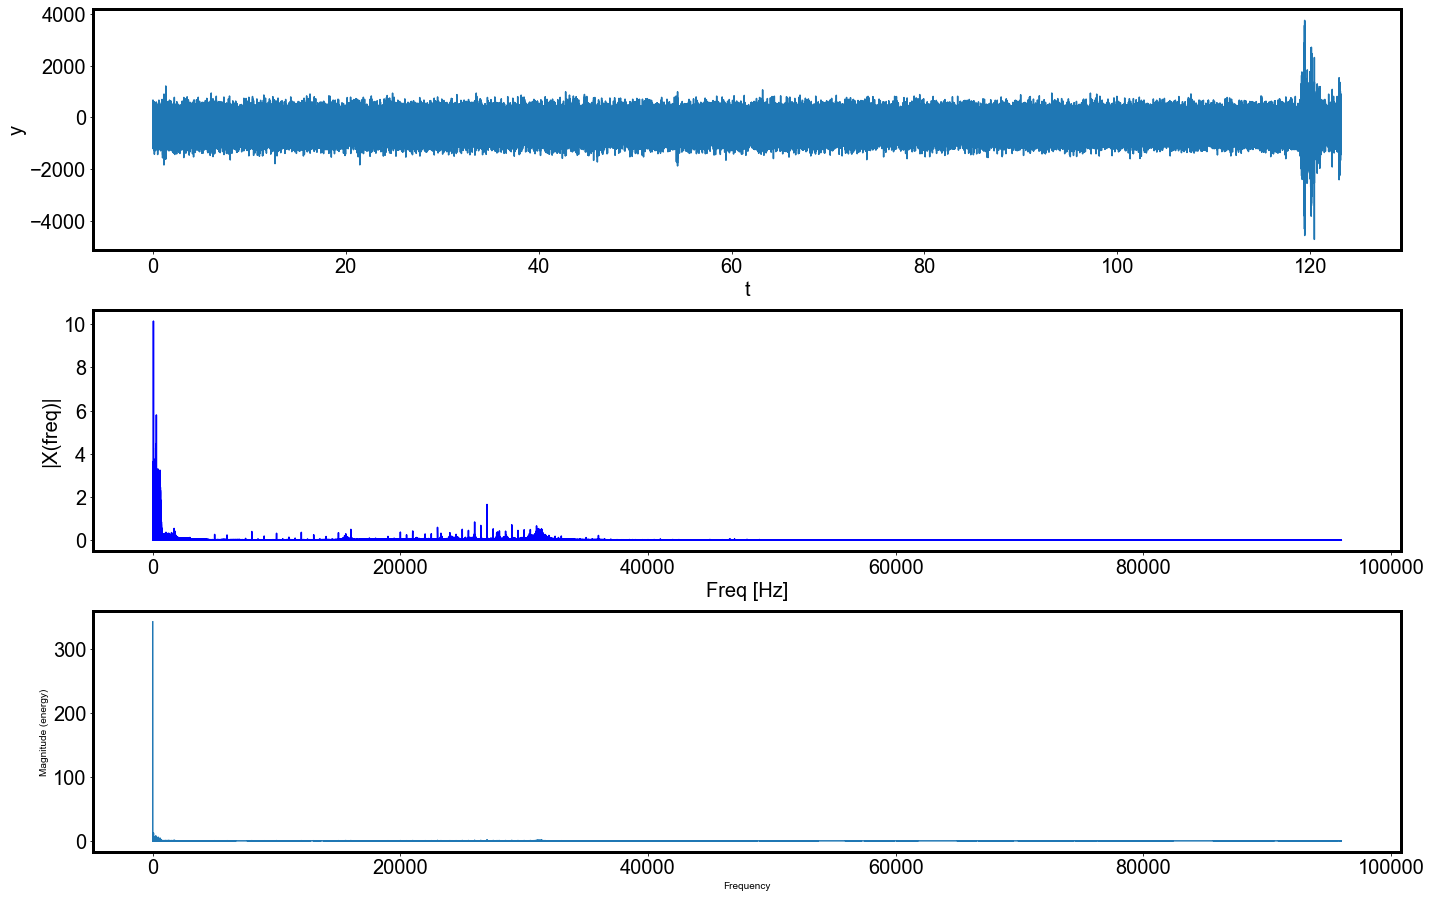

In [7]:
## wav data 
wav_file_name = 'Ultrasonic2020-10-16T10_12_54.wav'
sr, signal = wavfile.read(wav_file_name)

signal.shape
signal.ndim

y = signal
t = np.arange(len(y)) / float(sr)

plt.figure(figsize=(20,12))
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.xlabel('t', fontsize=20)
plt.ylabel('y', fontsize=20)

frq, X = frequency_spectrum(y, sr)

plt.subplot(3, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq [Hz]', fontsize=20)
plt.ylabel('|X(freq)|', fontsize=20)
plt.tight_layout()

plt.subplot(3, 1, 3)
magspec = plt.magnitude_spectrum(y, sr) # returns tuple with frequencies and associated magnitudes

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3

plt.show()

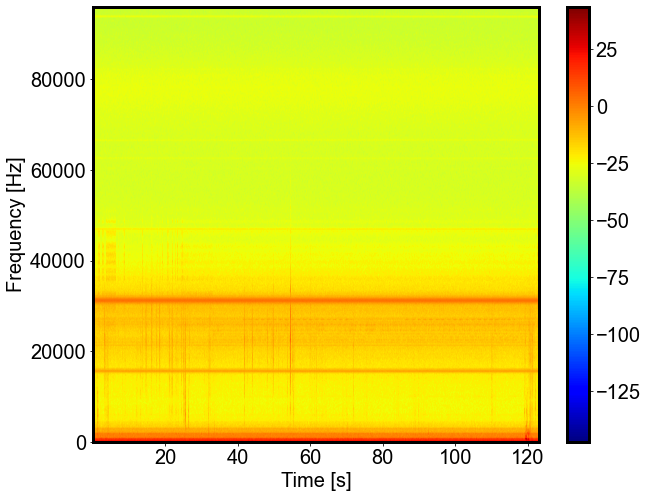

In [8]:
plt.figure(figsize=(10,8))
Pxx, freqs, bins, im = plt.specgram(signal, NFFT=1024, Fs=sr, noverlap=900, cmap='jet')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Frequency [Hz]', fontsize=20)
plt.colorbar()

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3